---
title: Trabalho 2
subject: Trabalho
subtitle: Utilizando o Python para problemas científicos
short_title: Trabalho 2
authors:
  - name: Wesley Cota
    affiliations:
      - Universidade Federal de Viçosa (UFV)
    orcid: 0000-0002-7859-8394
    email: wesley.cota@ufv.br
    url: https://wcota.me
#license: "All Rights Reserved"
keywords: fortran, git, python
kernelspec:
  name: python3
  display_name: "Python 3"
exports:
- format: pdf
  template: physical_review_journals
abbreviations:
  DVCS: Distributed Version Control
  CVS: Concurrent Versions System
---

# Instruções para o Trabalho 2

Utilize o botão de download acima para baixar o notebook e o execute onde preferir (Visual Studio Code, Google Colab, etc).

Envie o arquivo final com extensão `.ipynb` pelo PVANet Moodle com as células completadas.

Note que todo o notebook será executado pelo professor, de forma que tudo precisa estar funcionando para a melhor avaliação.

As células de resposta estão destacadas, e somente elas serão consideradas. Os esqueletos dos códigos são apenas de referência.

**É NECESSÁRIO COMENTAR O CÓDIGO PARA EXPLICAR O QUE ESTÁ SENDO FEITO! Utilize células em Markdown para melhorar a explicação do que está sendo feito, além dos comentários no próprio código** Cuidado com o uso de ferramentas de IA.

## Problema 1 [somente Python, sem bibliotecas]

Neste problema, vamos implementar o [Método de Newton–Raphson](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Newton%E2%80%93Raphson) para encontrar raízes. Esse método pode ser mais rápido que o da biseção, porém necessitamos conhecer tanto a função $f(x)$ quanto sua derivada, $f'(x)$.

Começando com um *chute* $x_1$, e calculando os valores de $f(x_1)$ e $f'(x_1)$, uma reta $g_1(x)$ tangente à curva é traçada para obter o valor de $x_2$ para o qual a reta intercepta o eixo $x$, *i.e.*, $g_1(x_2) = 0$. Se o valor de $f(x_2)$ está próximo de 0 com uma tolerância $\epsilon$, dizemos que $x_2$ é uma aproximação para a raiz da função. Caso contrário, a ação se repete até encontrarmos um valor dentro da margem de tolerância.

Para cada valor $x_i$, a reta tangente é dada por 

$$g_i(x) = [f'(x_i)](x-x_i)+f(x_i).$$

A solução para $g_i(x_{i+1})=0$ é

$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}.$$

Esse processo é repetido até obtermos $|f(x_{i+1})| < \epsilon$, e a função retorna $x_{i+1}$ como a raiz de $f(x)$ com tolerância $\epsilon$. 

Imagem ilustrativa do método funcionando: 

![metodo](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)

[(fonte)](https://en.wikipedia.org/wiki/File:NewtonIteration_Ani.gif)

### Item (a)

- Implemente uma função chamada `newton()` com os seguintes argumentos:

- `f`: função $f(x)$
- `df`: função derivada de $f(x)$
- `x0`: chute inicial de onde está a raiz
- `eps`: tolerância, que toma um valor padrão igual a `1e-6`.
- `n_max`: número máximo de iterações, com valor padrão igual a `100`.

Essa função deve retornar dois números, na ordem:

- O valor aproximado da raiz
- O número de iterações efetuadas para chegar nessa raiz.

Dentro da função, implemente o método de Newton–Raphson. Um esqueleto da função é apresentado abaixo, e deve ser alterado. Um `if` é necessário dentro do *loop* para que a função termine o cálculo quando o número de iterações for `n_max`.

> [!IMPORTANT] 
> **Implementação da função `newton()`**
> 
> Faça em células abaixo a implementação pedida.

In [1]:
####################################################
####################################################
####################################################
############### Problema 1, item a #################
####################################################
####################################################
####################################################

#code without library "math"

def newton(x0, f, df, eps=1e-6, n_max=100):
    """
    The "newton" function implements the Newton-Raphson 
    method to find the roots of a function f(x). It takes 
    as parameters the function f(x) itself, its derivative 
    f'(x), and the initial guess x0. Additional parameters,
    such as "eps" (tolerance criterion) and "n_max" (maximum
    number of iterations). Returns x approximation to 
    the root of the function f(x) and number of iterations 
    performed n_it.
    """

    # Convert strings to executable functions using "eval"
    # Define the function `f(x)` from the string `f_str`
    def f(x): 
        return eval(f_str)  # Evaluate the function f(x) as a string
    
    # Define the derivative `df(x)` from the string `df_str`
    def df(x): 
        return eval(df_str)  # Evaluate the derivative f'(x) as a string

    x = x0  # Assigns the initial guess `x0` to the variable `x`
    n_it = 0  # Initialize the iteration counter

    while n_it < n_max:  # Loop until the maximum number of iterations is reached
        # Recalculate the new value of `x` using the Newton-Raphson formula
        x = x - f(x) / df(x)
        
        # Check if the absolute difference between the old and new `x` values is within the tolerance `eps`
        if abs(x0 - x) < eps: 
            break  # Exit the loop if the difference is smaller than the tolerance
        
        n_it += 1  # Increment the iteration counter
        x0 = x  # Update the old value `x0` with the new value `x`

    return x, n_it  # Return the approximated root `x` and the number of iterations `n_it`

In [4]:
#code with library "math"

import math  # Import the math library for mathematical functions

def newton(x0, f_str, df_str, eps=1e-6, n_max=100):
    """
    Implements the Newton-Raphson method to find the root of a function f(x).

    Parameters:
    - x0 (float): Initial guess for the root.
    - f_str (str): Function f(x) as a string.
    - df_str (str): Derivative f'(x) as a string.
    - eps (float): Tolerance for the stopping criterion (default: 1e-6).
    - n_max (int): Maximum number of iterations allowed (default: 100).

    Returns:
    - (float, int): Tuple containing the approximated root and the number of iterations performed.
    """
    # Convert the function and its derivative from strings to executable functions
    def f(x):
        return eval(f_str, {"math": math, "x": x})  # Evaluate f(x) with math functions and variable x

    def df(x):
        return eval(df_str, {"math": math, "x": x})  # Evaluate f'(x) with math functions and variable x

    x = x0  # Initialize the current guess for the root
    n_it = 0  # Initialize the iteration counter

    while n_it < n_max:  # Iterate until the maximum number of iterations is reached
        try:
            # Apply the Newton-Raphson formula: x_{n+1} = x_n - f(x_n) / f'(x_n)
            x_new = x - f(x) / df(x)
        except ZeroDivisionError:
            # Handle the case where the derivative is zero
            raise ValueError("Derivative is zero. Newton-Raphson method cannot proceed.")

        # Check if the change is within the specified tolerance
        if abs(x_new - x) < eps:
            break

        x = x_new  # Update the current guess
        n_it += 1  # Increment the iteration counter

    # Return the root approximation and the number of iterations
    return x, n_it

### Item (b)

- Agora, chame a função `newton` para obter a raiz da função $cos(x)$, com um chute inicial ao seu critério. Note que é possível colocar diretamente a função `cos()` como argumento, mas poderá ter problema ao colocar `df`. Você pode criar as funções `f()` e `df()` ou utilizar o `lambda`, como fizemos em aula.
- Imprima a raiz obtida e quantas iterações foram necessárias.

Abaixo, um exemplo da saída com o valor da raiz e o chute inicial.

> [!IMPORTANT] 
> **Uso da função `newton()` para $cos(x)$**
> 
> Faça em células abaixo a implementação pedida.

In [6]:
####################################################
####################################################
####################################################
############### Problema 1, item b #################
####################################################
####################################################
####################################################

# Define the function as a string (f(x) = x * e^(-x))
f_str = 'x*math.exp(-x)'

# Define the derivative of the function as a string (f'(x) = e^(-x) - x * e^(-x))
df_str = 'math.exp(-x) - (x*math.exp(-x))'

# Initial guess for the root, chosen arbitrarily
x0 = 0.5

resultado, iterations = newton(x0, f_str, df_str, eps=1e-7, n_max=100)

# Printing the result
# "resultado" is the approximated root, "iterations" is the number of iterations performed
print(f"The root is: {resultado}, and the method used: {iterations}")

The root is: -9.389621148813321e-14, and the method used: 6


### Item (c)

Vamos testar esse método onde pode dar problemas. Um desses casos é quando não existe uma raiz. 

- Aplique a função `newton()` para a função $f(x) = x^2 + 2$, com chute inicial ao seu critério, com no máximo $1000$ iterações.
- Responda (utilizando `print()`): podemos considerar que o valor obtido é a raiz da função?

Um exemplo da saída está abaixo.

> [!IMPORTANT] 
> **Uso da função `newton()` para $x^2 + 2$**
> 
> Faça em células abaixo a implementação pedida.

In [7]:
####################################################
####################################################
####################################################
############### Problema 1, item c #################
####################################################
####################################################
####################################################

# Define the function as a string (f(x) = x^2 + 2)
f_str = '(x**2) + 2'

# Define the derivative of the function as a string (f'(x) = 2x)
df_str = '2*x'

# Initial guess for the root, chosen arbitrarily
x0 = -36             

# Calling the Newton-Raphson method with the initial parameters
resultado, iterations = newton(x0, f_str, df_str, n_max=1000)

# Printing the result
# "resultado" is the approximated root, "iterations" is the number of iterations performed
print(f"The root is: {resultado}, and the method used: {iterations}")

# Explaining why the result is not valid as a root
print('Não podemos considerar o valor obtido como raiz da função, \n'
      'pois f(x) = x² + 2 possui raízes complexas e não cruzam \n'
      'o eixo x, além disso, o valor de tolerância sempre será menor \n'
      'que o da diferença')

The root is: -0.25479978317259677, and the method used: 1000
Não podemos considerar o valor obtido como raiz da função, 
pois f(x) = x² + 2 possui raízes complexas e não cruzam 
o eixo x, além disso, o valor de tolerância sempre será menor 
que o da diferença


### Item (d)

O método também pode falhar quando caímos em um intervalo assíntotico da função. Considere, por exemplo, a função $f(x) = x\exp(-x)$. Ela tem uma raiz, mas dependendo do chute podemos ir para uma região assintótica, não exatamente zero, na qual o método retorna uma pseudo raiz por conta do valor estar dentro do limite de tolerância.

- Utilize a função `newton()` com uma tolerância de $10^{-7}$ e valor padrão de limite de iterações, para a função $f(x) = x\exp(-x)$. Faça testes com pelo menos **2 chutes**, que resultem na raiz correta, e outro em um valor incorreto. O gráfico abaixo ajudará a decidir os valores.

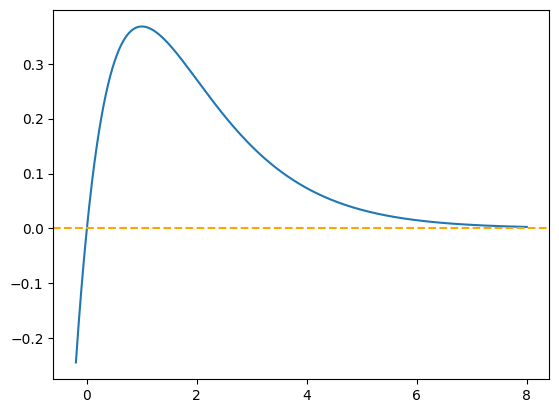

In [13]:
# NÃO USE ESTA CÉLULA!

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-0.2, 8, 1000)
y = x*np.exp(-x)

plt.plot(x, y)
plt.axhline(0, color='orange', ls='--')

> [!IMPORTANT] 
> **Uso da função `newton()` para $xe^{-x}$**
> 
> Faça em células abaixo a implementação pedida.

In [5]:
####################################################
####################################################
####################################################
############### Problema 1, item d #################
####################################################
####################################################
####################################################

# Define the function as a string (f(x) = x * e^(-x))
f_str = 'x*math.exp(-x)'

# Define the derivative of the function as a string (f'(x) = e^(-x) - x * e^(-x))
df_str = 'math.exp(-x) - (x*math.exp(-x))'

# Initial guess for the root, chosen arbitrarily
x0 = 0.5

# Calling the Newton-Raphson method with the initial parameters
resultado, iterations = newton(x0, f_str, df_str, eps=1e-7, n_max=100)

# Printing the result
# "resultado" is the approximated root, "iterations" is the number of iterations performed
print(f"The root is: {resultado}, and the method used: {iterations}")

The root is: -9.389621148813321e-14, and the method used: 6


### Item (e) 

Em muitos problemas de física, podemos encontrar as chamadas equações transcendentais, que só podem ser resolvidas numericamente. 

- Encontre a solução para 
$x = \cos(x)$
e imprima o resultado utilizando a função `print()` formatada para até 5 casas decimais, mostrando também o número de iterações necessárias para o chute inicial escolhido.

  > A saída deve ser parecida com a seguinte:
  > 
  > `A raiz é 0.73909, e o método utilizou 3 iterações.`

- Repita para pelo menos mais 3 chutes iniciais diferentes.

> [!IMPORTANT] 
> **Uso da função `newton()` para $x=\cos(x)$**
> 
> Faça em células abaixo a implementação pedida.

In [17]:
####################################################
####################################################
####################################################
############### Problema 1, item e #################
####################################################
####################################################
####################################################

# Define the function as a string (f(x) = cos(x))
f_str = 'math.cos(x) - x'

# Define the derivative of the function as a string (f'(x) = -sen(x))
df_str = '-math.sin(x) - 1'

# Initial guess for the root, chosen arbitrarily
x0 = 2

resultado, iterations = newton(x0, f_str, df_str, eps=1e-7, n_max=100)

# List of initial guesses for the root
initial_guesses = [2, 0.5, -1, 1.5]

# Iterate over the initial guesses and solve using the Newton-Raphson method
for x0 in initial_guesses:
    resultado, iterations = newton(x0, f_str, df_str, eps=1e-7, n_max=100)
    # Print the result, formatted to 5 decimal places
    print(f"A raiz é {resultado:.5f}, e o método utilizou {iterations} iterações.")

A raiz é 0.73909, e o método utilizou 3 iterações.
A raiz é 0.73909, e o método utilizou 3 iterações.
A raiz é 0.73909, e o método utilizou 7 iterações.
A raiz é 0.73909, e o método utilizou 3 iterações.


---

## Problema 2 (Pacotes `numpy` e `matplotlib`)

Vamos construir uma matriz que mostra o potencial elétrico de partículas puntiformes em uma superfície bidimensional.

### Item (a)

Defina uma função `V` que receba como argumentos a carga `q` em uma posição `x0` e `y0`, e as posições `x` e `y`. Neste caso, assumimos que a carga `q` está na posição `x0` e `y0`, e queremos calcular o potencial em `x` e `y`.

Vamos assumir a seguinte forma para o potencial na posição $\vec{r} = (x,y)$ devido a uma carga $q$ na posição $\vec{r}_0 = (x_0,y_0)$:

$$V(\vec{\mathcal{r}}) = \frac{q}{|\vec{r}-\vec{r}_0|}$$

*Dicas:*

- Caso utilize a função `sqrt`, utilize a do NumPy com `np.sqrt()`!
- Teste a função com `V(10,2,4,3,5)`, que deve retornar o valor `7.071067811865475`.

> [!IMPORTANT] 
> **Definição da função `V()`**
> 
> Faça em células abaixo a implementação pedida.

In [ ]:
####################################################
####################################################
####################################################
############### Problema 2, item a #################
####################################################
####################################################
####################################################

import numpy as np # Imports the numpy library for numerical operations

def V(q, x0, y0, x, y):
    # Calculates the distance between the points (x, y) and (x0, y0)
    denominator = np.sqrt((x - x0)**2 + (y - y0)**2)
    
    # Calculates the potential
    return q / denominator

V(10, 2, 4, 3, 5)

np.float64(7.071067811865475)

### Item (b)

Crie uma lista de partículas chamada `cargas` contendo tuplas `(q,x0,y0)`. Adicione 5 partículas com as seguintes cargas e posições:

- $q = 1$, em $(x_0,y_0) = (5,5)$
- $q = -1$, em $(x_0,y_0) = (-5,10)$
- $q = -1$, em $(x_0,y_0) = (0,0)$
- $q = 1$, em $(x_0,y_0) = (-5,-5)$
- $q = 2$, em $(x_0,y_0) = (20,-20)$

> [!IMPORTANT] 
> **Criação de cargas**
> 
> Faça em células abaixo a implementação pedida.

In [19]:
####################################################
####################################################
####################################################
############### Problema 2, item b #################
####################################################
####################################################
####################################################

# Initializes an empty list to store particles with their charges and positions
cargas = []

# Adds particles to the list, each represented by a tuple (charge, x_position, y_position)
cargas = []
cargas.append((1, 5, 5))
cargas.append((-1, -5, 10))
cargas.append((-1, 0, 0))
cargas.append((1, -5, -5))
cargas.append((2, 20, -20))

# Returns the list of particles with their charges and positions
cargas

[(1, 5, 5), (-1, -5, 10), (-1, 0, 0), (1, -5, -5), (2, 20, -20)]

### Item (c) 

Agora vamos criar um sistema de coordenadas utilizando `np.meshgrid()`. As coordenadas $x$ e $y$ devem varrer o espaço entre $-20$ e $20$, com 500 pontos cada. Utilize a função `np.linspace()` para isso.

Depois, crie as variáveis `xc` e `yc` com `np.meshgrid(x,y)`.

> [!IMPORTANT] 
> **Definição do grid**
> 
> Faça em células abaixo a implementação pedida.

In [20]:
####################################################
####################################################
####################################################
############### Problema 2, item c #################
####################################################
####################################################
####################################################

# Creating the grid
x = np.linspace(-20, 20, 500)  # Generates 500 x-values from -20 to 20
y = np.linspace(-20, 20, 500)  # Generates 500 y-values from -20 to 20

# Creating the coordinate mesh
xc, yc = np.meshgrid(x, y)  # Creates a 2D mesh grid of coordinates with x and y values

xc, yc  # Returns the coordinate matrices xc (for x) and yc (for y)

(array([[-20.        , -19.91983968, -19.83967936, ...,  19.83967936,
          19.91983968,  20.        ],
        [-20.        , -19.91983968, -19.83967936, ...,  19.83967936,
          19.91983968,  20.        ],
        [-20.        , -19.91983968, -19.83967936, ...,  19.83967936,
          19.91983968,  20.        ],
        ...,
        [-20.        , -19.91983968, -19.83967936, ...,  19.83967936,
          19.91983968,  20.        ],
        [-20.        , -19.91983968, -19.83967936, ...,  19.83967936,
          19.91983968,  20.        ],
        [-20.        , -19.91983968, -19.83967936, ...,  19.83967936,
          19.91983968,  20.        ]], shape=(500, 500)),
 array([[-20.        , -20.        , -20.        , ..., -20.        ,
         -20.        , -20.        ],
        [-19.91983968, -19.91983968, -19.91983968, ..., -19.91983968,
         -19.91983968, -19.91983968],
        [-19.83967936, -19.83967936, -19.83967936, ..., -19.83967936,
         -19.83967936, -19.839679

### Item (d)

Vamos agora calcular o potencial total devido às cinco cargas adicionadas anteriormente.

Para isso, faça um loop para cada `carga` em `cargas` e calcule o potencial resultante fornecendo as propriedades da carga e os eixos x e y dados pelo `np.meshgrid()`. Por exemplo, para calcular o potencial devido a cada carga utilizamos:

```python
for carga in cargas:
  potencial = V(*carga, x=xc, y=yc)
```

Crie uma `ndarray` vazia (com `np.zeros()`) chamada `potencial_total` de tamanho $500 \times 500$, ou seja, o mesmo *shape* de `xc` e `yc`. Repetindo o loop acima, calcule o potencial total e execute a função `mostrar_potencial(x,y,potencial_total)`.

> [!IMPORTANT] 
> **Definição do potencial no grid**
> 
> Faça em células abaixo a implementação pedida.

/tmp/ipykernel_4236/2708682363.py:16: RuntimeWarning: divide by zero encountered in divide
  return q / denominator


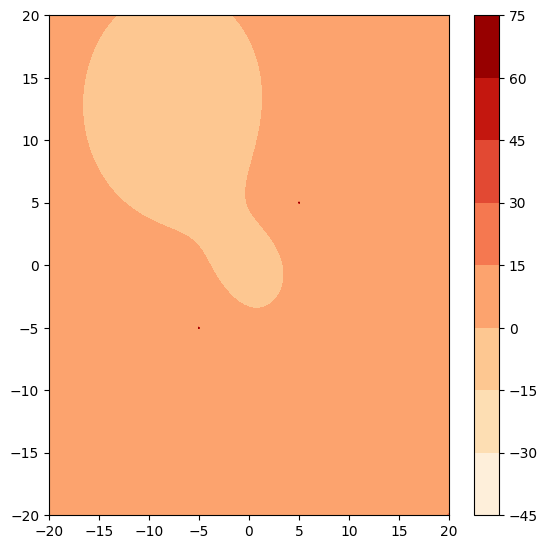

In [21]:
####################################################
####################################################
####################################################
############### Problema 2, item b #################
####################################################
####################################################
####################################################

import matplotlib.pyplot as plt  # Imports the Matplotlib library for plotting
import numpy as np  # Imports NumPy for numerical operations

def mostrar_potencial(x, y, z, Ex=None, Ey=None):
    # Function to visualize the potential using contour plots and streamlines

    WIDTH, HEIGHT, DPI = 500, 500, 100  # Sets the dimensions and resolution of the plot
    fig = plt.figure(figsize=(WIDTH / DPI, HEIGHT / DPI))  # Creates a figure with the specified size
    ax = fig.add_subplot()  # Adds a subplot to the figure
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)  # Adjusts subplot layout

    cmap = plt.get_cmap('OrRd')  # Sets the color map for contour plots
    ct = ax.contourf(x, y, z, cmap=cmap)  # Creates a filled contour plot of the potential
    fig.colorbar(ct)  # Adds a color bar to the plot

    if type(Ex) != type(None) and type(Ey) != type(None):  # Checks if electric field components Ex and Ey are provided
        color = np.log(np.sqrt(Ex**2 + Ey**2))  # Calculates the color intensity based on the magnitude of the electric field
        ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.plasma,  # Creates a streamplot of the electric field
                      density=3, arrowstyle='->')  # Adjusts stream plot density and arrow style

# Initializes the total potential array to zero
potencial_total = np.zeros(shape=xc.shape)

# Calculates the total potential by summing the potentials from all charges
for carga in cargas:
    potencial_total += V(carga[0], carga[1], carga[2], xc, yc)

# Displays the potential using the mostrar_potencial function
mostrar_potencial(x, y, potencial_total)


> *Bonus*: (opcional!)
> 
> Se tudo estiver certo, rode o seguinte código para ver os vetores de campo elétrico.

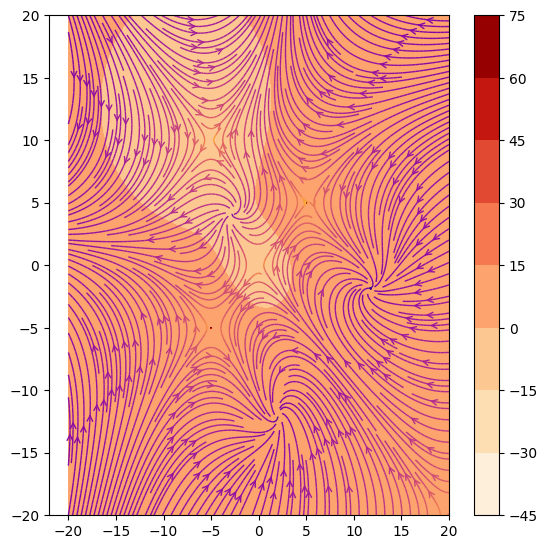

In [22]:
Ex, Ey = np.gradient(potencial_total)
mostrar_potencial(x, y, potencial_total, Ex, Ey)

---

## Problema 3 (Pacotes `numpy`, `matplotlib` e `scipy`)

Vamos resolver um problema de difração de luz utilizando transformadas de Fourier. 

Considere uma onda se movendo em $z < 0$ com comprimento de onda $\lambda$. O número de onda é dado por $ k = 2\pi/\lambda$.

Essa onda incide em uma placa contendo uma fenda em $z = 0$ e queremos ver o resultado em uma tela posicionada em $z = L$.

Para estimar numericamente o padrão de difração dessa luz, podemos discretizar o sistema e utilizar o pacote `fft` do SciPy.

![](https://rafael-fuente.github.io/images/angular-spectral-method/angular-spectral-method-single-slit-diffraction.png)

Fonte: <https://rafael-fuente.github.io>

Referência: Introduction to Fourier Optics, Joseph Goodman


### Item (a)

Considere que o plano no qual a luz irá incidir seja definido por um retângulo em $-L_x<x<L_x$ e $-L_y < y < L_y$. O eixo $x$ será discretizado em $N_x$ pontos, e o $y$ em $N_y$ pontos.

Vamos considerar:

$L_x = 1400~\mu\text{m}, L_y = 400~\mu\text{m}$, com $N_x = 2500$ e $N_y = 1500$ pontos.

- Defina as variáveis `Lx,Ly,Nx,Ny` com seus respectivos valores.

- Crie as arrays `x` e `y` e um *meshgrid* `xc,yc`.

- Defina array bidimensional com nome `f` com valores iguais a zero, com o mesmo *shape* do *meshgrid* criado.

- Execute o seguinte código para conferência:

```python
print(xc.shape, yc.shape, f.shape)
print(xc.min(), xc.max(), yc.min(), yc.max())
print(f.min(), f.max())
```

> [!IMPORTANT] 
> **Definição do plano**
> 
> Faça em células abaixo a implementação pedida.

In [23]:
####################################################
####################################################
####################################################
############### Problema 3, item a #################
####################################################
####################################################
####################################################

import numpy as np  # Importing the NumPy library

# Defining the grid dimensions and number of points
Lx = 1400e-6  # Length in the x direction in meters
Ly = 400e-6   # Length in the y direction in meters
Nx = 2500      # Number of points in the x direction
Ny = 1500      # Number of points in the y direction

# Creating the coordinate arrays for x and y
x = np.linspace(-Lx/2, Lx/2, Nx)  # Creates x values from -Lx/2 to Lx/2
y = np.linspace(-Ly/2, Ly/2, Ny)  # Creates y values from -Ly/2 to Ly/2

# Generating the mesh grid for 2D coordinates
xc, yc = np.meshgrid(x, y)  # Creates 2D arrays xc and yc representing the grid of coordinates

# Initializing the array f with zeros
f = np.zeros_like(xc)  # Array of zeros with the same shape as xc

# Printing the shapes and min/max values of the arrays for verification
print(xc.shape, yc.shape, f.shape)  # Shape of the coordinate arrays and f
print(xc.min(), xc.max(), yc.min(), yc.max())  # Min and max values of xc and yc
print(f.min(), f.max())  # Min and max values of the f array

(1500, 2500) (1500, 2500) (1500, 2500)
-0.0007 0.0007 -0.0002 0.0002
0.0 0.0


### Item (b)

A função $f(x_{n_x},y_{n_y})$ recebe um valor igual a 1 nas posições da fenda, e 0 onde não há. A variável `f` definida anteriormente representa essa função discretizada.

Na célula abaixo foi definida uma função chamada `criar_fenda(xc,yc,f,x0,y0,R)` para criar fendas circulares. Ela recebe como parâmetro as variáveis `xc,yc,f` definidas acima, e mais 3 argumentos:

- `x0`: posição $x$ do centro da fenda

- `y0`: posição $y$ do centro da fenda

- `R`: raio da fenda

**Faça:**

- Crie um fenda na origem, de raio igual a $22~\mu\text{m}$.

- Utilize o código

```python
ax.imshow(f, extent = [-Lx, Lx, -Ly, Ly], cmap="gray")
```

para mostrar a placa.

- Formate os eixos para seus respectivos nomes e unidades.

*Dica: utilize `ax.set_aspect("equal")` para melhorar a proporção do gráfico.*


> [!IMPORTANT] 
> **Definição da fenda central**
> 
> Faça em células abaixo a implementação pedida.

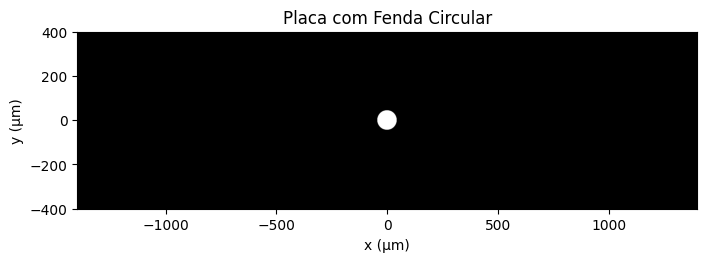

In [24]:
####################################################
####################################################
####################################################
############### Problema 3, item b #################
####################################################
####################################################
####################################################

import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import numpy as np  # Importing NumPy for numerical operations

# Function to create a circular slit
def criar_fenda(xc, yc, f, x0, y0, R):
    # Sets values in the array f to 1 within a circular region of radius R centered at (x0, y0)
    f[((xc-x0)**2 + (yc-y0)**2 < R**2)] = 1

# Defining values for grid dimensions and the slit
Lx = 1400  # Plate length in micrometers
Ly = 400   # Plate width in micrometers
Nx = 2500  # Number of points in the x direction
Ny = 1500  # Number of points in the y direction

# Creating the x and y arrays
x = np.linspace(-Lx/2, Lx/2, Nx)  # x values range from -Lx/2 to Lx/2
y = np.linspace(-Ly/2, Ly/2, Ny)  # y values range from -Ly/2 to Ly/2

# Creating the meshgrid for 2D coordinates
xc, yc = np.meshgrid(x, y)  # Creating 2D arrays for x and y coordinates

# Initializing the array f with zeros (representing the plate)
f = np.zeros_like(xc)  # Array with the same shape as xc, initially filled with zeros

# Creating a slit at the origin with a radius of 22 micrometers
R = 22  # Slit radius in micrometers
criar_fenda(xc, yc, f, x0=0, y0=0, R=R)  # Creating the slit at the origin

# Plotting the plate with the slit
plt.figure(figsize=(8, 6), dpi=100)  # Creates a figure for plotting
ax = plt.gca()  # Gets the current axes
ax.set_aspect("equal")  # Ensures the aspect ratio is equal for both axes
ax.imshow(f, extent=[-Lx, Lx, -Ly, Ly], cmap="gray")  # Displays the array f as an image

# Formatting the axes with units in micrometers
ax.set_xlabel("x (µm)")  # Label for the x-axis
ax.set_ylabel("y (µm)")  # Label for the y-axis
ax.set_title("Placa com Fenda Circular")  # Title of the plot

plt.show()  # Displays the plot



### Item (c)

O resultado da função de onda em $z = L$ pode ser aproximado por uma integral de Fresnel. Após a discretização, precisamos fazer a transformada de Fourier discreta (DFT) da função

$$g(x,y) = f(x,y) e^{\frac{ik}{2L}\left( x^2 + y^2\right)},$$

resultando em

$$\begin{gathered}
  G(x'_{n_x}, y'_{n_y}) = \sum _{n_{x}=0}^{N_{x}-1}\sum _{n_{y}=0}^{N_{y}-1}g(x_{n_{x}},y_{n_{y}})e^{-{i2\pi x'_{n_x}{\frac {n_{x}}{N_{x}}} -{i2\pi y'_{n_y}{\frac {n_{y}}{N_{y}}}}}}.
\end{gathered}$$

O valor de $\left|G(\mu_{x}, \mu_{y})\right|$ nos dá a amplitude nos pontos de observação $(x'_{n_x}, y'_{n_y})$ da tela, dados por

$$\begin{gathered}
x'_{n_x}  = \frac{(n_x - N_{x}/2) L \lambda}{2 L_{x}} \\
y'_{n_y}  = \frac{(n_y - N_{y}/2) L \lambda}{2 L_{y}}
\end{gathered}.$$

Vamos fazer isso de forma eficiente utilizando o pacote `fft` do SciPy.

> [!Warning]
> Não será necessário entender as equações acima para fazer o exercício!

**Faça**:

- Defina variáveis para a distância $L = 5~\text{m} = 5\times 10^6~\mu\text{m}$, comprimento de onda $\lambda = 1.85~\text{nm} = 0.00185~\mu\text{m}$, e número de onda $k = 2\pi/\lambda$.

- Importe o pacote `fft` do SciPy com o nome `spfft`.

- Aplique a função `spfft.fft2` na função $g(x,y)$, que no caso é dada pela multiplicação da variável `f` no item (a) pela exponencial utilizando o resultado do *meshgrid*. Salve o resultado em uma variável chamada `fft_G`.

- Aplique a função `spfft.fftshift` na variável `fft_G`, salvando o resultado como variável `G`. Isso é necessário para centralizar a transformação em torno de $x' = y' = 0$.

- Depois de fazer tudo isso, ajeite o código abaixo para mostrar o gráfico, acrescentando os comandos para indicar os valores dos eixos e a escala de cor para a amplitude. O gráfico de cima mostra a intensidade relativa ao máximo ao longo de $y = 0$, e o de baixo mostra o padrão de difração.

> [!IMPORTANT] 
> **Cálculo da intensidade**
> 
> Faça em células abaixo a implementação pedida.

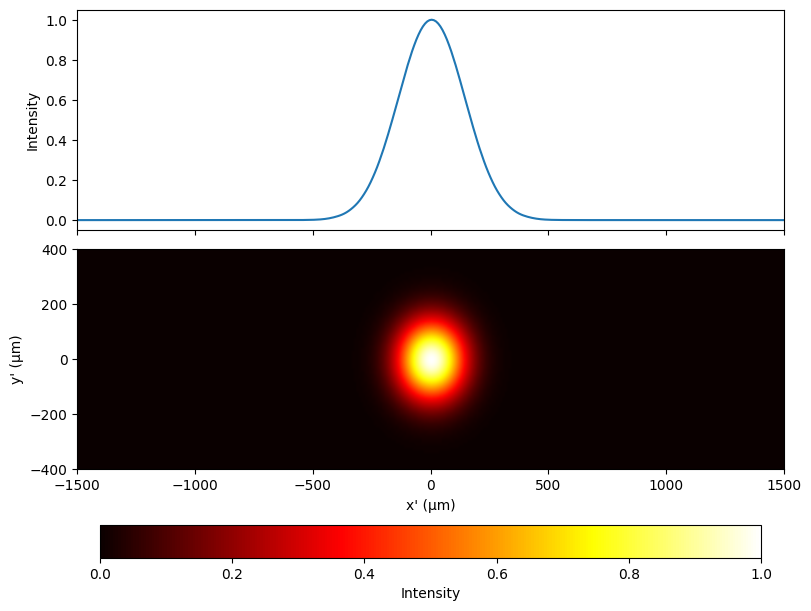

In [25]:
####################################################
####################################################
####################################################
############### Problema 3, item c #################
####################################################
####################################################
####################################################

import numpy as np  # Importing NumPy for numerical operations
import scipy.fft as spfft  # Importing SciPy's FFT for Fourier transforms
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Defining parameters
L = 5e6  # Distance in micrometers (5 meters)
lb = 0.00185  # Wavelength in micrometers
k = 2 * np.pi / lb  # Wave number

# Dimensions of the aperture and resolution
Nx, Ny = 2048, 2048  # Number of points in x and y
Lx, Ly = 1000, 1000  # Aperture dimensions in micrometers

# Coordinates for the aperture
xc = np.linspace(-Lx / 2, Lx / 2, Nx)
yc = np.linspace(-Ly / 2, Ly / 2, Ny)
xc, yc = np.meshgrid(xc, yc)  # Creating the 2D coordinate grid

# Gaussian aperture function
f = np.exp(-((xc / 200) ** 2 + (yc / 200) ** 2))

# Function g(x, y) with a quadratic phase factor
g = f * np.exp(1j * k / (2 * L) * (xc**2 + yc**2))

# 2D Fourier Transform and centralization
fft_G = spfft.fft2(g)  # Applying the 2D FFT to the function g
G = spfft.fftshift(fft_G)  # Shifting the FFT to center it

# Calculating the intensity in the diffraction pattern
abs_G = np.abs(G)

# Calculating screen coordinates
dx_screen = L * lb / Lx  # Step size in x'
dy_screen = L * lb / Ly  # Step size in y'

Lx_screen = Nx * dx_screen / 2  # Total extent in x'
Ly_screen = Ny * dy_screen / 2  # Total extent in y'

# Creating the plot
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 6), dpi=100, constrained_layout=True)

# Plotting intensity along y = 0 (horizontal line)
x_prime = np.linspace(-Lx_screen, Lx_screen, Nx)
ax[0].plot(x_prime, abs_G[Ny // 2, :] / abs_G.max())
ax[0].set_ylabel("Intensity")

# Displaying the 2D diffraction pattern
grafico = ax[1].imshow(abs_G**2 / (abs_G**2).max(), cmap='hot',  # Normalizing intensity and applying a colormap
                       extent=[-Lx_screen, Lx_screen, -Ly_screen, Ly_screen],
                       interpolation="bilinear", aspect="auto")

# Setting axis limits
ax[1].set_xlim([-1500, 1500])  # Adjusting limits for correct scale
ax[1].set_ylim([-400, 400])    # Adjusting limits for correct scale

# Labeling axes
ax[1].set_xlabel(r"x' (µm)")
ax[1].set_ylabel(r"y' (µm)")

# Adding a color bar
fig.colorbar(grafico, orientation="horizontal").set_label("Intensity")

# Showing the plot
plt.show()


**Opcional**

Repita tudo o que foi feito acima, agora com duas fendas do mesmo tamanho da anterior, separadas por uma distância $D = 128~\mu\text{m}$ e depois por $D = 500~\mu\text{m}$, em torno da origem.

Não se esqueça de zerar a variável `f` antes de criar as fendas novamente.

---
## Problema 4 (Pacotes `pandas` e `seaborn`)

**Reproduzindo gráficos de artigo da Nature**

Vamos tentar reproduzir alguns gráficos de um artigo científico publicado na Nature com dados abertos: <https://www.nature.com/articles/s41586-021-03409-2>.

Após o processamento dos dados com o `pandas`, vamos utilizar o `matplotlib` e o `seaborn` para plotar os quatro gráficos da Figura 1 do artigo. A figura é esta:

![](https://i.imgur.com/dgT0WUY.png)

Os dados foram disponibilizados em formato CSV em "Source data": https://www.nature.com/articles/s41586-021-03409-2#Sec13. Existem quatro arquivos, cada um para cada figura e **vamos utilizar apenas o primeiro deles**. No entanto, os dados não estão em um formato completamente adequado. Por exemplo, há colunas em branco separando os dados para cada um dos subgráficos (a,b,c e d).

A tarefa aqui é de filtrar esses dados e fazer os gráficos. Para os gráficos em a. e b., vamos utilizar uma forma de mapear dados em 3D para um grid com uma função do SciPy. Já em c. e d., vamos utilizar o `seaborn` com o que já aprendemos anteriormente. 

O resultado final não será exatamente o mesmo, mas dará uma ideia de como tratar dados científicos com Python.

### Item (a)

O link para o arquivo com os dados da primeira figura é https://static-content.springer.com/esm/art%3A10.1038%2Fs41586-021-03409-2/MediaObjects/41586_2021_3409_MOESM3_ESM.csv.

Esses dados estão separados por TAB, isto é, por um separador especial `\t`. 

- Utilizando a função `read_csv()` do `pandas` com o argumento `sep` adequado, crie um dataframe chamado `df_fig1` a partir do arquivo acima.

**Obs: é normal demorar carregar, pois o arquivo é pesado!** Ele deve conter 432800 linhas e 52 colunas.

> [!IMPORTANT] 
> **Abrir os dados da Figura 1**
> 
> Faça em células abaixo a implementação pedida.

In [56]:
####################################################
####################################################
####################################################
############### Problema 4, item a #################
####################################################
####################################################
####################################################

import pandas as pd  # Importing pandas for data manipulation and analysis

# Reading a CSV file from a URL into a DataFrame
# The file is tab-separated, indicated by the `sep="\t"` parameter
df_fig1 = pd.read_csv(
    "https://static-content.springer.com/esm/art%3A10.1038%2Fs41586-021-03409-2/MediaObjects/41586_2021_3409_MOESM3_ESM.csv", 
    sep="\t"  # Specifying tab as the delimiter between values
)

df_fig1  # Displaying the DataFrame with the loaded data

,Fig1a,rho_xx,magnetic_field,nu,Unnamed: 4,Fig1b,rho_xx.1,temperature,nu.1,Unnamed: 9,...,vH_4.5K,diff_vH_4.5K,Unnamed: 44,nu.12,vH_8K,diff_vH_8K,Unnamed: 48,nu.13,vH_20K,diff_vH_20K
0,NaN,1.113178e+06,0.0,-3.960483,NaN,NaN,320.729237,0.016000,-4.734486,NaN,...,3.990258,54.766740,NaN,-4.272094,3.942158,54.599892,NaN,-4.272094,3.958963,54.660726
1,NaN,7.737762e+05,0.0,-3.955262,NaN,NaN,312.183598,0.016000,-4.723163,NaN,...,3.984057,54.778701,NaN,-4.265010,3.936336,54.609459,NaN,-4.265010,3.951963,54.656180
2,NaN,6.058442e+05,0.0,-3.950041,NaN,NaN,320.512820,0.016000,-4.711841,NaN,...,3.976844,54.792117,NaN,-4.257926,3.930504,54.619254,NaN,-4.257926,3.944962,54.647409
3,NaN,5.624204e+05,0.0,-3.944820,NaN,NaN,320.242710,0.016000,-4.700518,NaN,...,3.970495,54.806345,NaN,-4.250842,3.923329,54.633460,NaN,-4.250842,3.938274,54.635163
4,NaN,5.105263e+05,0.0,-3.939599,NaN,NaN,345.466801,0.016000,-4.689195,NaN,...,3.963786,54.815686,NaN,-4.243758,3.915217,54.651019,NaN,-4.243758,3.931948,54.617824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432795,NaN,NaN,NaN,NaN,NaN,NaN,438.079191,4.204082,4.267012,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432796,NaN,NaN,NaN,NaN,NaN,NaN,421.088092,4.204082,4.278334,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432797,NaN,NaN,NaN,NaN,NaN,NaN,403.768506,4.204082,4.289657,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432798,NaN,NaN,NaN,NaN,NaN,NaN,386.100386,4.204082,4.300980,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Item (b) 

Antes de prosseguir, rode a célula abaixo para definir a função `plotar_heatmap_log(x,y,z,zmin,zmax,zlabel,ax)`. Ela será utilizada para transformar um arquivo com dados *xyz* em um grid apropriado a ser utilizado com a função `imshow()`.

> [!Warning]
> Não esqueça de executar a célula abaixo!

In [64]:
import seaborn as sns
import scipy.interpolate as spitp
import matplotlib.colors as mplc
sns.set_style("white")


def plotar_heatmap_log(x, y, z, zmin, zmax, zlabel, ax):
    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()

    points = [(xx, yy) for xx, yy in zip(x, y)]

    xx = np.linspace(xmin, xmax, 1000)
    yy = np.linspace(ymin, ymax, 1000)
    xc, yc = np.meshgrid(xx, yy)

    zc = spitp.griddata(points, z, (xc, yc), method='linear')

    cmap = plt.get_cmap('seismic')
    norm = mplc.LogNorm(vmin=zmin, vmax=zmax)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    ax.imshow(zc, extent=(xmin, xmax, ymin, ymax), aspect='auto',
              origin="lower", norm=norm, cmap=cmap)

    fig = plt.gcf()
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label(zlabel)

Agora vamos tentar plotar o gráfico 1a. Vamos utilizar as colunas `rho_xx`, `magnetic_field` e `nu`. 

- Crie um dataframe chamado `df_fig1a` apenas com essas colunas. Utilize `dropna()` para remover quaisquer valores NaN. O resultado final deve ser um dataframe com 3 colunas e 120000 linhas.
- Após fazer isso, chame a função `plotar_heatmap_log` com os parâmetros:

  - `x`: coluna "nu" de `df_fig1a`
  - `y`: coluna "magnetic_field" de `df_fig1a`
  - `z`: coluna "rho_xx" de `df_fig1a`
  - `zmin`: valor $10^2$
  - `zmax`: valor $10^6$
  - `zlabel`: "$\rho_{xx}$"
  - `ax`: Axes atual (`plt.gca()`)

- Depois, defina o eixo x com `ax.set_xlim()` para valores entre -3.5 e 0. Escreva os nomes apropriados nos eixos também:
  - eixo x: "$\nu_0$"
  - eixo y: "$B$"

> [!IMPORTANT] 
> **Fazer o gráfico 1a**
> 
> Faça em células abaixo a implementação pedida.

Text(0, 0.5, '$B$')

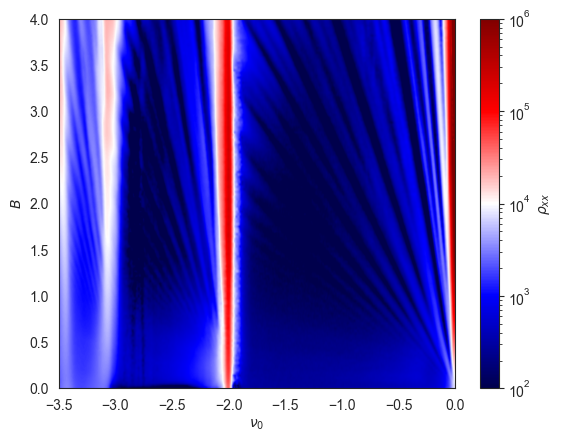

In [73]:
####################################################
####################################################
####################################################
############### Problema 4, item b #################
####################################################
####################################################
####################################################

# Creating the dataframe df_fig1a by selecting the necessary columns and removing NaN values
df_fig1a = df_fig1[['rho_xx', 'magnetic_field', 'nu']].dropna()

# Configuring the axis for the plot
ax = plt.gca()  # Getting the current axis

# Calling the function to plot the heatmap
# x: Frequency (nu), y: Magnetic field, z: Resistivity (rho_xx)
# zmin and zmax set the limits for the color scale (logarithmic scale)
# zlabel specifies the label for the colorbar
plotar_heatmap_log(
    x=df_fig1a['nu'],  # x-axis data (nu)
    y=df_fig1a['magnetic_field'],  # y-axis data (magnetic field)
    z=df_fig1a['rho_xx'],  # z-axis data (resistivity)
    zmin=1e2,  # Lower limit of the color scale
    zmax=1e6,  # Upper limit of the color scale
    zlabel=r"$\rho_{xx}$",  # Label for the colorbar
    ax=ax  # Axis to plot on
)

# Adjusting the limits and axis labels
ax.set_xlim(-3.5, 0)  # Setting the limits for the x-axis (frequency)
ax.set_xlabel(r"$\nu_0$")  # Label for the x-axis (frequency)
ax.set_ylabel(r"$B$")  # Label for the y-axis (magnetic field)


### Item (c)

Agora vamos fazer o gráfico 1b. Vamos utilizar as colunas `rho_xx.1`, `temperature` e `nu.1`. 

- Crie um dataframe chamado `df_fig1b` apenas com essas colunas. Utilize `dropna()` para remover quaisquer valores NaN. 

- Utilizando `df_fig1b.columns = [nome1, nome2, nome3]`, renomeie as colunas para `rho_xx`, `temperature` e `nu`. 
O resultado final deve ser um dataframe com 3 colunas e 432800 linhas.

- Após fazer isso, chame a função `plotar_heatmap_log` com os parâmetros:

  - `x`: coluna "nu" de `df_fig1b`
  - `y`: coluna "temperature" de `df_fig1b`
  - `z`: coluna "rho_xx" de `df_fig1b`
  - `zmin`: valor $10^2$
  - `zmax`: valor $10^6$
  - `zlabel`: "$\rho_{xx}$"
  - `ax`: Axes atual (`plt.gca()`)

- Depois, defina o eixo x com `ax.set_xlim()` para valores entre -3.5 e 0. Escreva os nomes apropriados nos eixos também:
  - eixo x: "$\nu_0$"
  - eixo y: "$T$"


> [!IMPORTANT] 
> **Fazer o gráfico 1b**
> 
> Faça em células abaixo a implementação pedida.

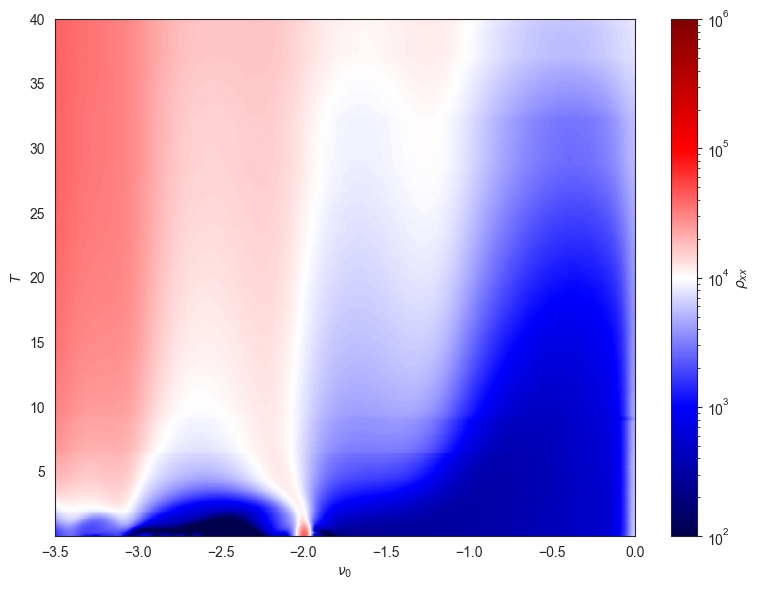

In [72]:
####################################################
####################################################
####################################################
############### Problema 4, item c #################
####################################################
####################################################
####################################################

# Create the dataframe df_fig1b with relevant columns and drop any missing values
df_fig1b = df_fig1[['rho_xx.1', 'temperature', 'nu.1']].dropna()

# Rename the columns for clarity and consistency
df_fig1b.columns = ['rho_xx', 'temperature', 'nu']

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Call the plotar_heatmap_log function to create the heatmap
plotar_heatmap_log(
    x=df_fig1b['nu'],               # Column "nu" as the x-axis
    y=df_fig1b['temperature'],      # Column "temperature" as the y-axis
    z=df_fig1b['rho_xx'],           # Column "rho_xx" as the color values
    zmin=10**2,                     # Minimum value for log scale (10^2)
    zmax=10**6,                     # Maximum value for log scale (10^6)
    zlabel=r"$\rho_{xx}$",          # Label for the color bar
    ax=ax                           # Axis where the plot will be drawn
)

# Set the x-axis limits to focus on the desired range
ax.set_xlim(-3.5, 0)

# Add labels to the axes
ax.set_xlabel(r"$\nu_0$")           # Label for the x-axis, rendered as LaTeX
ax.set_ylabel(r"$T$")              # Label for the y-axis, rendered as LaTeX

# Automatically adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

### Item (d)

Para as figuras c e d, o acesso aos dados começa a ficar mais complicado. Como o arquivo CSV não foi bem formatado, temos diferentes colunas de `rho_xx` e `nu` espalhadas. Vamos utilizar os dados referentes às temperaturas 1K, 5K, 10K, 20K, e 40K.

- Crie uma lista de dataframes `df_fig1c`.
- Agora, gere um dataframe chamado `_df` extraindo as colunas `nu.2` e `rho_xx_1K` de `df_fig1`. Acrescente `copy()` ao final para garantir que está apenas copiando os dados.

- Renomeie as colunas de `_df` para `nu` e `rho_xx`, como fizemos antes.

- Depois, crie uma coluna chamada `temperature` com o texto `1K`.

- Finalmente, utilize `df_fig1c = df_fig1c.append(_df.dropna())` para adicionar o dataframe intermediário ao dataframe completo. 

- Agora, repita o procedimento acima para as temperaturas e respectivas colunas, sempre utilizando o `df_fig1c.append()` ao final:

  - 5K: 'nu.4' e 'rho_xx_5K'
  - 10K: 'nu.6' e 'rho_xx_10K'
  - 20K: 'nu.7' e 'rho_xx_20K'
  - 50K: 'nu.8' e 'rho_xx_40K'

No final, o dataframe `df_fig1c = pd.concat(df_fig1c).reset_index()` deve conter 3 colunas e 4000 linhas.

- Utilize a função `sns.lineplot()` para plotar o gráfico de `x="nu"` e `y="rho_xx"` com as cores definidas pela coluna `temperature`. Utilize os parâmetros `data`, `ax` e `hue` apropriados.

- Defina o eixo x para ser entre -3.5 e 0, e o y para ser de 0 até 30000. Escreva os nomes apropriados nos eixos também:
  - eixo x: "$\nu_0$"
  - eixo y: "$\rho_{xx}$"

> [!IMPORTANT] 
> **Fazer o gráfico 1c**
> 
> Faça em células abaixo a implementação pedida.

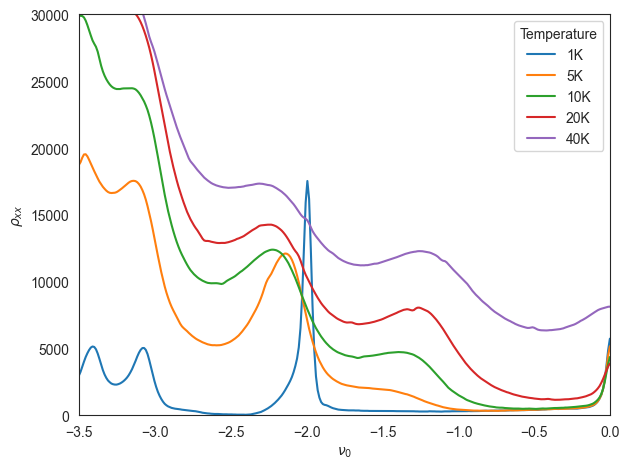

In [78]:
####################################################
####################################################
####################################################
############### Problema 4, item d #################
####################################################
####################################################
####################################################

# Step 1: Create a list to store the temporary dataframes
df_fig1c = []

# Step 2: Extract and process the data for each temperature, as mentioned in your problem description
# For 1K, 'nu.2' and 'rho_xx_1K'
_df = df_fig1[['nu.2', 'rho_xx_1K']].copy()  # Extract the relevant columns
_df.columns = ["nu", "rho_xx"]  # Rename columns for consistency
_df["temperature"] = "1K"  # Add a temperature column
df_fig1c.append(_df.dropna())  # Append to list, drop NaN values

# Repeat the same for other temperatures:
# For 5K, 'nu.4' and 'rho_xx_5K'
_df = df_fig1[['nu.4', 'rho_xx_5K']].copy()
_df.columns = ["nu", "rho_xx"]
_df["temperature"] = "5K"
df_fig1c.append(_df.dropna())

# For 10K, 'nu.6' and 'rho_xx_10K'
_df = df_fig1[['nu.6', 'rho_xx_10K']].copy()
_df.columns = ["nu", "rho_xx"]
_df["temperature"] = "10K"
df_fig1c.append(_df.dropna())

# For 20K, 'nu.7' and 'rho_xx_20K'
_df = df_fig1[['nu.7', 'rho_xx_20K']].copy()
_df.columns = ["nu", "rho_xx"]
_df["temperature"] = "20K"
df_fig1c.append(_df.dropna())

# For 40K, 'nu.8' and 'rho_xx_40K'
_df = df_fig1[['nu.8', 'rho_xx_40K']].copy()
_df.columns = ["nu", "rho_xx"]
_df["temperature"] = "40K"
df_fig1c.append(_df.dropna())

# Step 3: Concatenate all the individual dataframes into one
df_fig1c = pd.concat(df_fig1c).reset_index(drop=True)  # Reset index after concatenation

# Step 4: Plotting the data
ax = plt.gca()  # Get the current axis for plotting

# Use Seaborn to plot the data
sns.lineplot(data=df_fig1c, x="nu", y="rho_xx", hue="temperature", ax=ax)

# Step 5: Set the axis limits and labels
ax.set_xlim(-3.5, 0)  # X-axis limit
ax.set_ylim(0, 30000)  # Y-axis limit
ax.set_xlabel("$\\nu_0$")  # X-axis label with LaTeX style
ax.set_ylabel("$\\rho_{xx}$")  # Y-axis label with LaTeX style

# Show the plot
plt.legend(title="Temperature")  # Legend with title 'Temperature'
plt.tight_layout()  # Ensure layout is tight to prevent clipping
plt.show()  # Display the plot


### Item (e)

Agora vamos finalmente fazer o gráfico 1d. 

- Para isso, repita todo o procedimento do Item (d) para as seguintes temperaturas e respectivas colunas, criando o dataframe `df_fig1d` de 6000 linhas e com as 3 colunas `nu`, `vH` e `temperature`:

  - 0.5K: 'nu.9' e 'vH_0.5K'
  - 2.5K: 'nu.10' e 'vH_2.5K'
  - 4.5K: 'nu.11' e 'vH_4.5K'
  - 8K: 'nu.12' e 'vH_8K'
  - 20K: 'nu.13' e 'vH_20K'

- Utilize a função `sns.lineplot()` para plotar o gráfico de `x="nu"` e `y="vH"` com as cores definidas pela coluna `temperature`. Utilize os parâmetros `data`, `ax` e `hue` apropriados.

- Defina o eixo x para ser entre -3.5 e 0, e o y para ser de 0 até 3. Escreva os nomes apropriados nos eixos também:
  - eixo x: "$\nu_0$"
  - eixo y: "$\nu_H - \nu_0$"

> [!IMPORTANT] 
> **Fazer o gráfico 1d**
> 
> Faça em células abaixo a implementação pedida.

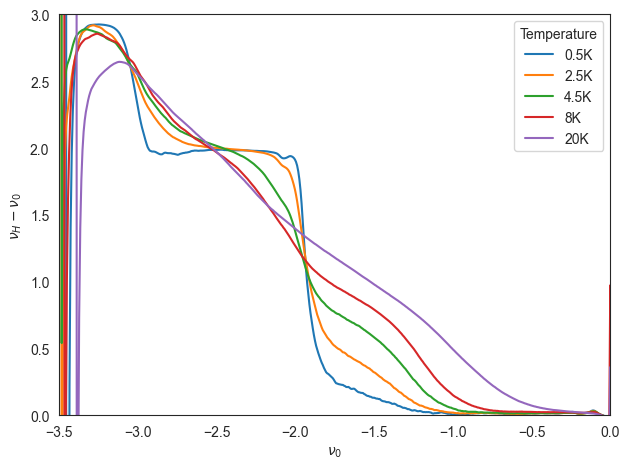

In [82]:
####################################################
####################################################
####################################################
############### Problema 4, item e #################
####################################################
####################################################
####################################################

# Step 1: Create a list to store the temporary dataframes
df_fig1d = []

# Step 2: Extract and process the data for each temperature
# For 0.5K, 'nu.9' and 'vH_0.5K'
_df = df_fig1[['nu.9', 'vH_0.5K']].copy()  # Extract the relevant columns
_df.columns = ["nu", "vH"]  # Rename columns for consistency
_df["temperature"] = "0.5K"  # Add a temperature column
df_fig1d.append(_df.dropna())  # Append to list, drop NaN values

# Repeat the same for other temperatures:
# For 2.5K, 'nu.10' and 'vH_2.5K'
_df = df_fig1[['nu.10', 'vH_2.5K']].copy()
_df.columns = ["nu", "vH"]
_df["temperature"] = "2.5K"
df_fig1d.append(_df.dropna())

# For 4.5K, 'nu.11' and 'vH_4.5K'
_df = df_fig1[['nu.11', 'vH_4.5K']].copy()
_df.columns = ["nu", "vH"]
_df["temperature"] = "4.5K"
df_fig1d.append(_df.dropna())

# For 8K, 'nu.12' and 'vH_8K'
_df = df_fig1[['nu.12', 'vH_8K']].copy()
_df.columns = ["nu", "vH"]
_df["temperature"] = "8K"
df_fig1d.append(_df.dropna())

# For 20K, 'nu.13' and 'vH_20K'
_df = df_fig1[['nu.13', 'vH_20K']].copy()
_df.columns = ["nu", "vH"]
_df["temperature"] = "20K"
df_fig1d.append(_df.dropna())

# Step 3: Concatenate all the individual dataframes into one
df_fig1d = pd.concat(df_fig1d).reset_index(drop=True)  # Reset index after concatenation

# Step 4: Plotting the data
ax = plt.gca()  # Get the current axis for plotting

# Use Seaborn to plot the data
sns.lineplot(data=df_fig1d, x="nu", y="vH", hue="temperature", ax=ax)

# Step 5: Set the axis limits and labels
ax.set_xlim(-3.5, 0)  # X-axis limit
ax.set_ylim(0, 3)  # Y-axis limit
ax.set_xlabel("$\\nu_0$")  # X-axis label with LaTeX style
ax.set_ylabel("$\\nu_H - \\nu_0$")  # Y-axis label with LaTeX style

# Show the plot
plt.legend(title="Temperature")  # Legend with title 'Temperature'
plt.tight_layout()  # Ensure layout is tight to prevent clipping
plt.show()  # Display the plot

**Opcional**

Se der tudo certo, crie um gráfico com `fig, axs = plt.subplots(2,2,figsize=(8,6), dpi=150` e copie os códigos gerados acima, modificando os parâmetros `ax=` das funções para os Axes apropriados. O resultado deverá ser como o seguinte:

*Dica: utilize `fig.tight_layout()` para melhorar o espaçamento entre as figuras.*

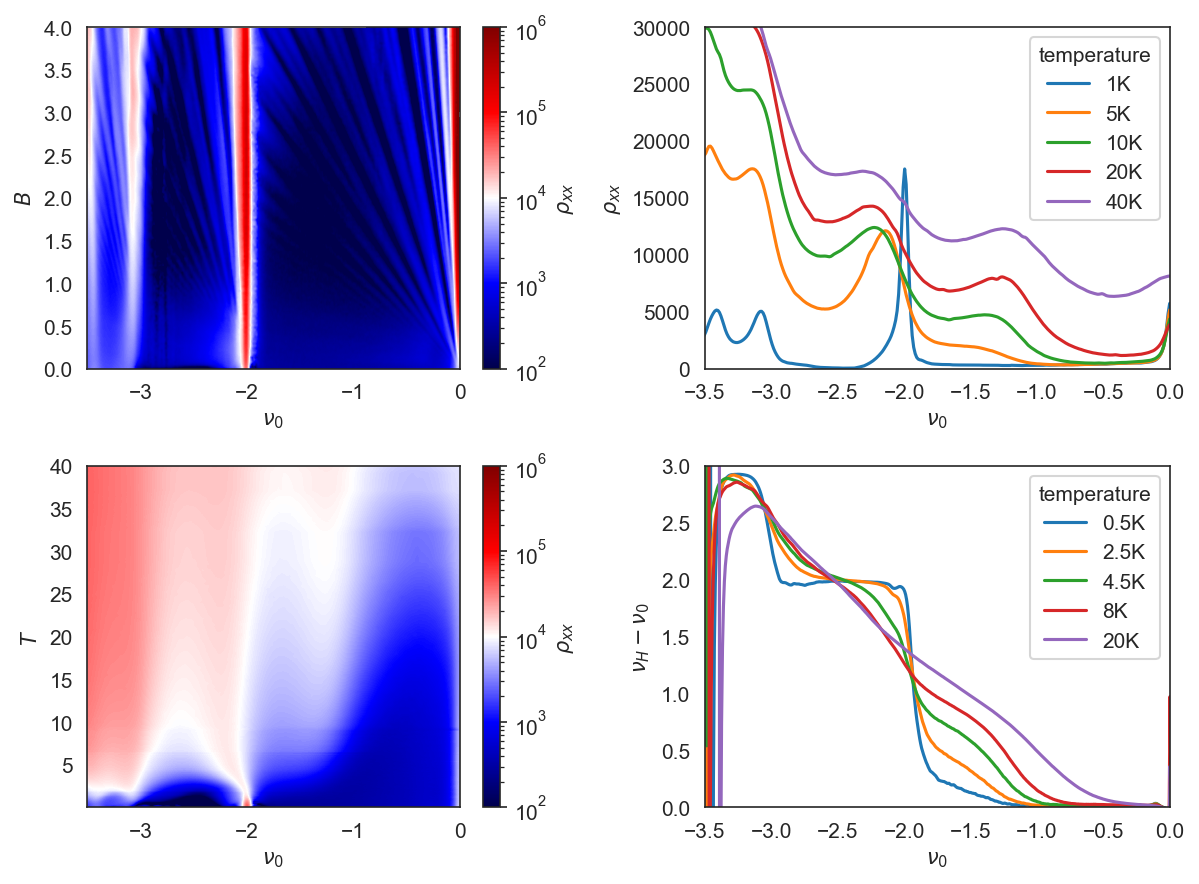